# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


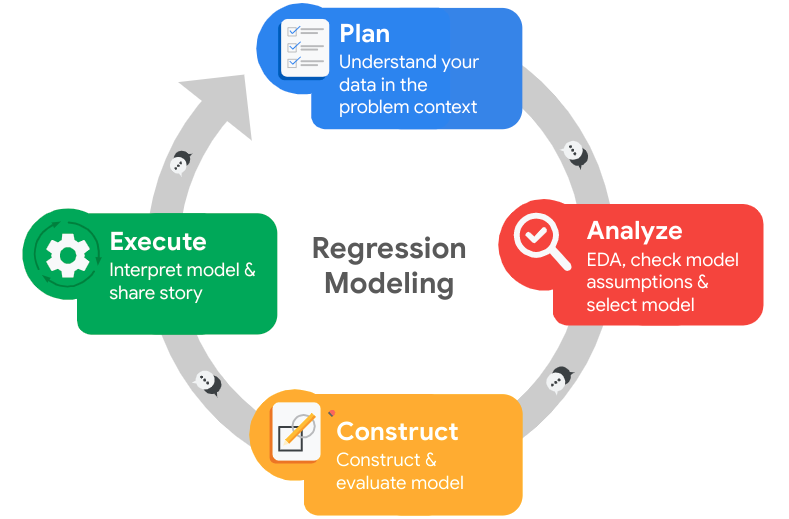

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- My stakeholders are the Salifort leadership team
- We are trying to better understand the problem and develop a solution, the ultimate goal for this project is to develop a machine learning (ML) model that predicts whether an employee will leave the company based on the survey data


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [155]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd 
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import seaborn as sns
from matplotlib import pyplot as plt


# This lets us see all of the columns, preventing Juptyer from redacting them.
### YOUR CODE HERE ###
pd.set_option('display.max_columns', None)

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# This is the function that helps plot feature importance
### YOUR CODE HERE ###
from xgboost import plot_importance

# This module lets us save our models once we fit them.
### YOUR CODE HERE ###
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns = {'number_project' : 'number_of_projects', 'average_montly_hours' : 'average_monthly_hours', 
                      'Work_accident' : 'work_accident', 'Department' : 'department', 'time_spend_company' : 'tenure'}, 
           inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.loc[df0.duplicated(keep=False),:]

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.copy()
df = df.drop_duplicates(keep = 'first', ignore_index=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df.duplicated().sum())
df.head()

0


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

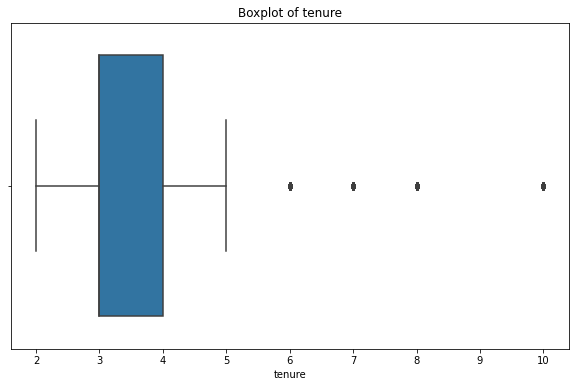

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(10,6))
plt.title('Boxplot of tenure', fontsize=12)
sns.boxplot(x='tenure', data = df)
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Fonction to detect outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [13]:
# Find the outliers with the function
outliers_tenure = detect_outliers_iqr(df,'tenure')

# Show the outliers detected 
print("Outliers detected in 'tenure'")
outliers1 = pd.DataFrame(outliers_tenure)
outliers1

Outliers detected in 'tenure'


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11985,0.22,0.94,3,193,10,0,0,1,management,high
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_of_projects         int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

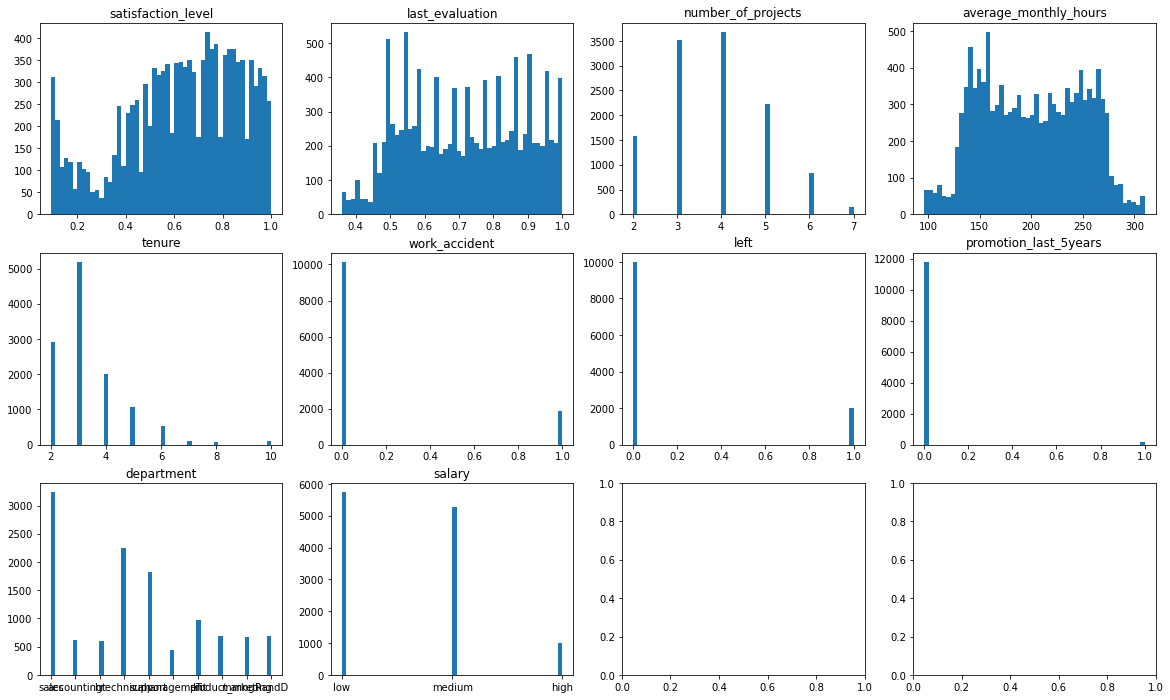

In [16]:
# Visualization of features distribution

fig, axs = plt.subplots(3, 4, figsize=(20, 12))
axs = axs.ravel()

for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins=50)
    axs[i].set_title(column)

plt.show()

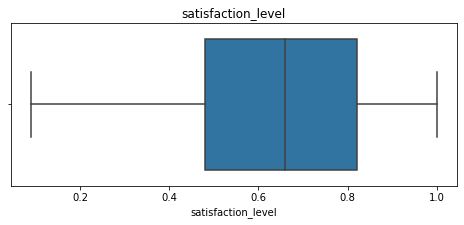

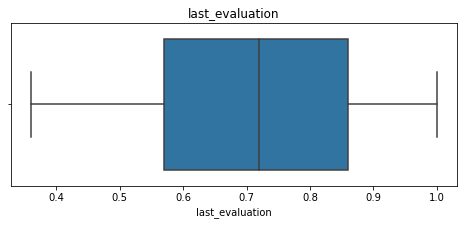

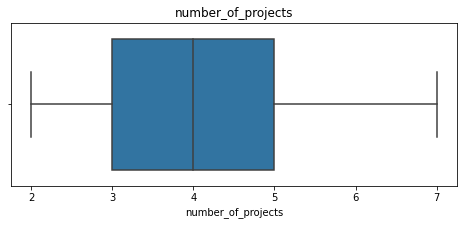

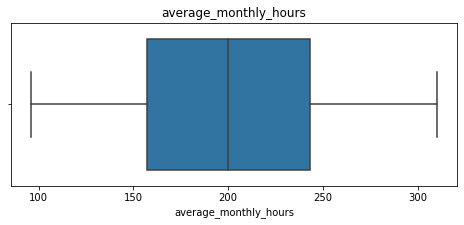

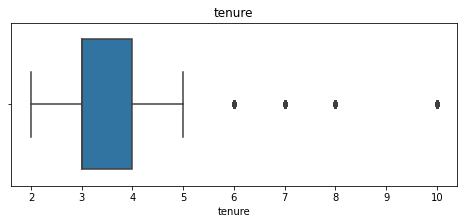

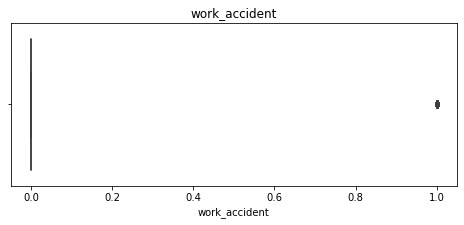

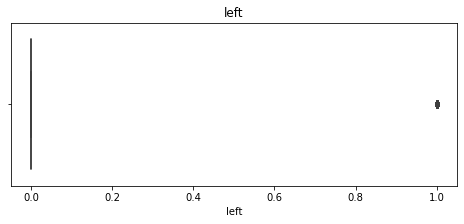

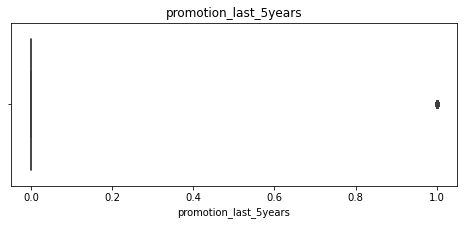

In [17]:
# Boxplot for each quantitative feature

quant_vars = df.select_dtypes(include=['float64', 'int64'])

for var in quant_vars:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=quant_vars[var], ax=ax)
    plt.title(var)
    plt.show()

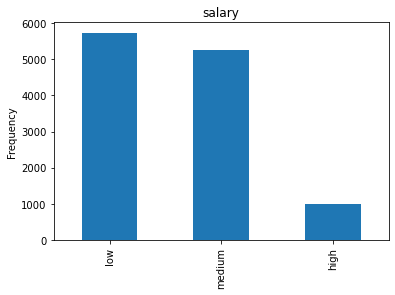

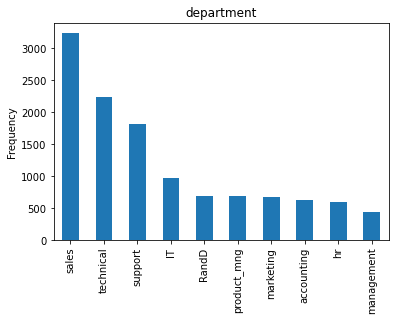

In [18]:
# Cat vars
cat_vars = ['salary','department']

for var in cat_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.ylabel('Frequency')
    plt.show()

satisfaction_level


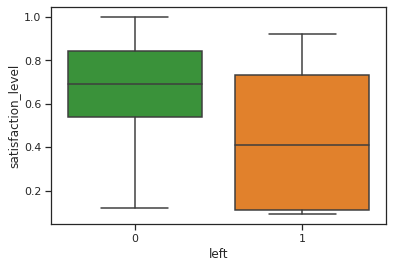

last_evaluation


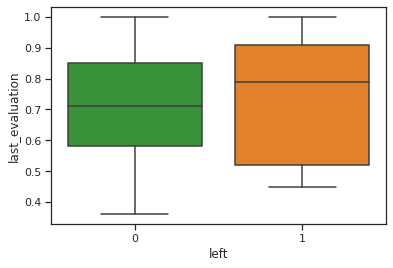

number_of_projects


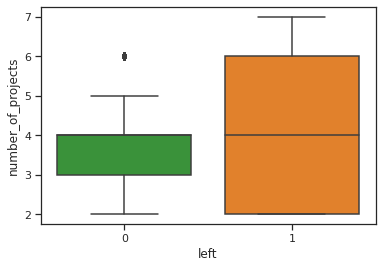

average_monthly_hours


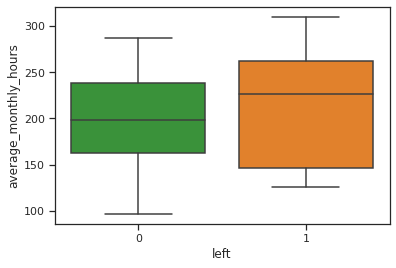

tenure


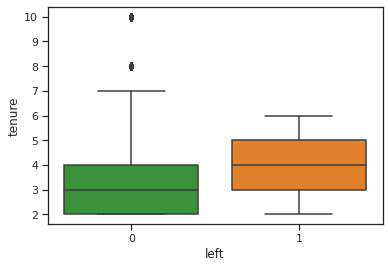

work_accident


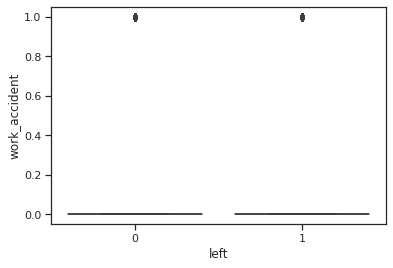

promotion_last_5years


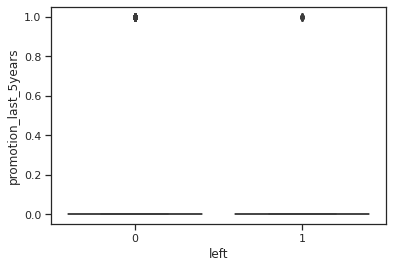

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Visualzation of the difference between the 2 groups 

# Selection of quantitative features 
quant_vars = df.select_dtypes(include=['float64', 'int64'])
quant_vars = quant_vars.drop('left', axis=1)

# Parameters of the boxplots
sns.set(style='ticks')
colors = sns.color_palette('tab10')
my_palette ={0: colors[2], 1: colors[1]} 

for var in quant_vars :
    print(var)
    sns.boxplot(x='left', y=var, data=df, palette = my_palette)
    plt.show()

number_of_projects


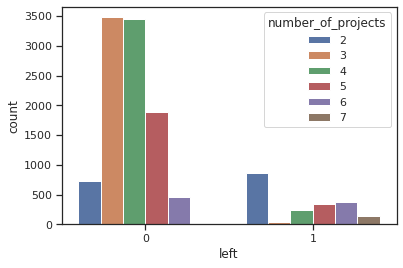

tenure


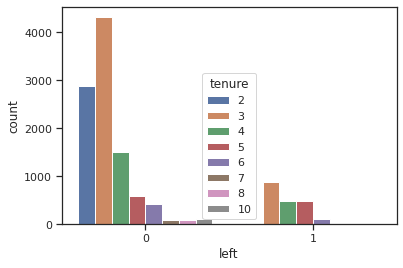

work_accident


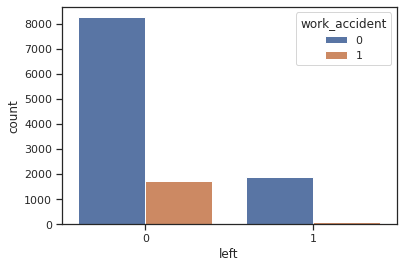

promotion_last_5years


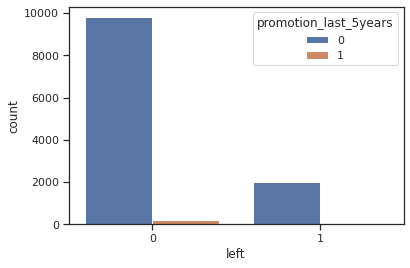

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

int_vars = df.select_dtypes(include=['int64'])
int_vars = int_vars.drop(['left','average_monthly_hours'], axis=1)

for var in int_vars :
    print(var)
    sns.countplot(x='left', data=df, hue=var)
    plt.show()

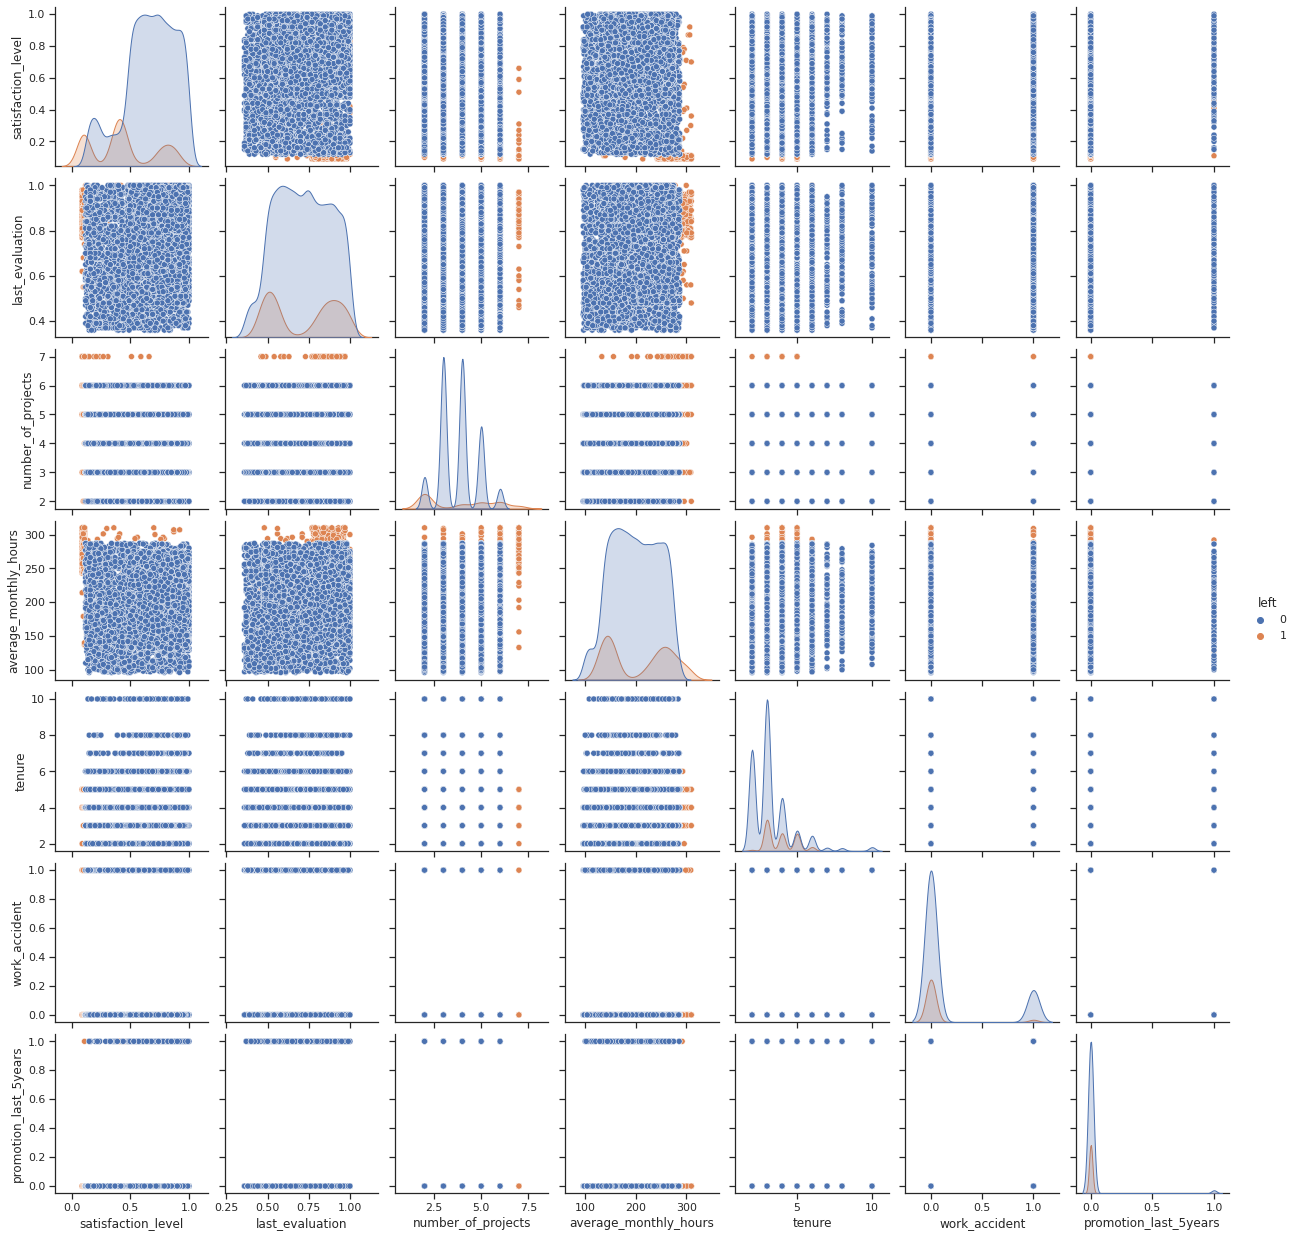

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.pairplot(df, hue='left')

As we've seen, some features seems to be correlated with the fact that an employee left :

- the satisfaction level
- the number of projects : all employees who have worked on 7 projects left
- average monthly hours : it seems that there's a correlation with the employees who worked a lot and their last evaluation, or maybe they didn't have the promotion they wanted

In [22]:
# Check the count of people who worked on 7 projects

df.loc[df['number_of_projects'] == 7,'left'].value_counts()

1    145
Name: left, dtype: int64

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

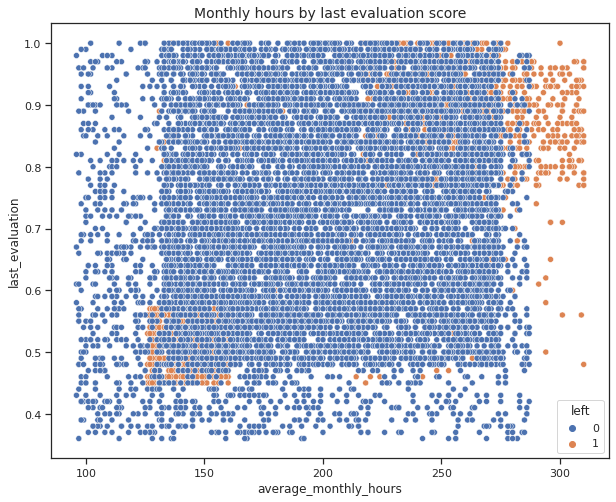

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left')
plt.title('Monthly hours by last evaluation score', fontsize='14')

Text(0.5, 1.0, 'Monthly hours by promotion on the last 5 years ')

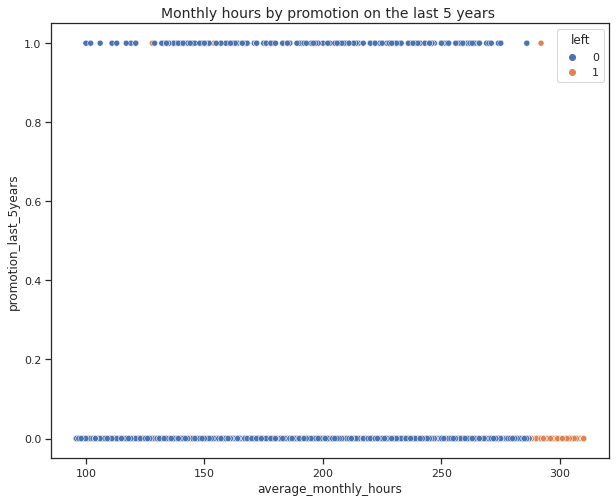

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.title('Monthly hours by promotion on the last 5 years ', fontsize='14')

Text(0.5, 1.0, 'Monthly hours by tenure ')

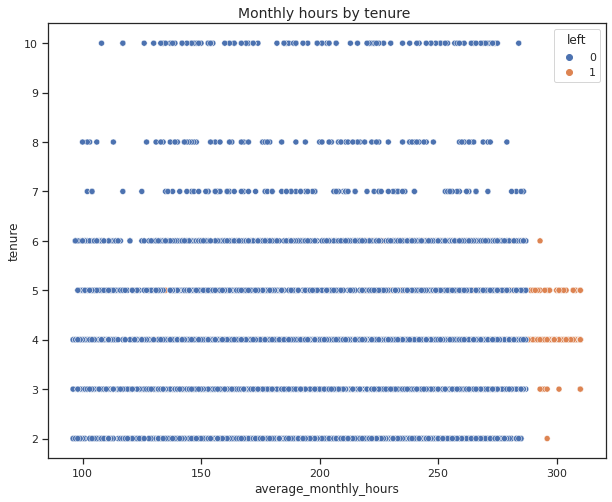

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='tenure', hue='left')
plt.title('Monthly hours by tenure ', fontsize='14')

Text(0.5, 1.0, 'Monthly hours by satisfactiob level')

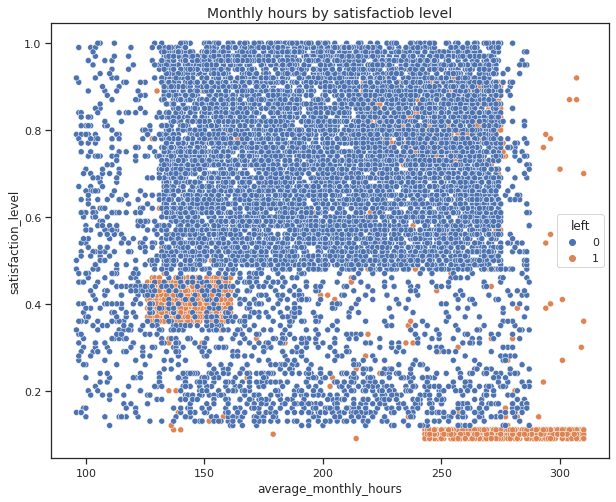

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left')
plt.title('Monthly hours by satisfactiob level', fontsize='14')

In [27]:
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


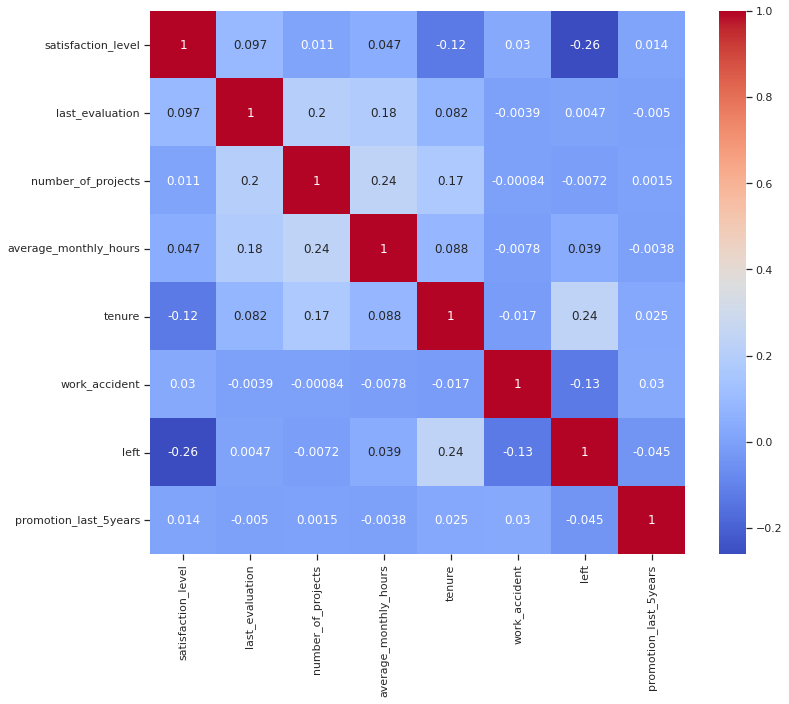

In [36]:
# Correlation heatmap 

corr_matrix = df.corr(method='kendall')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

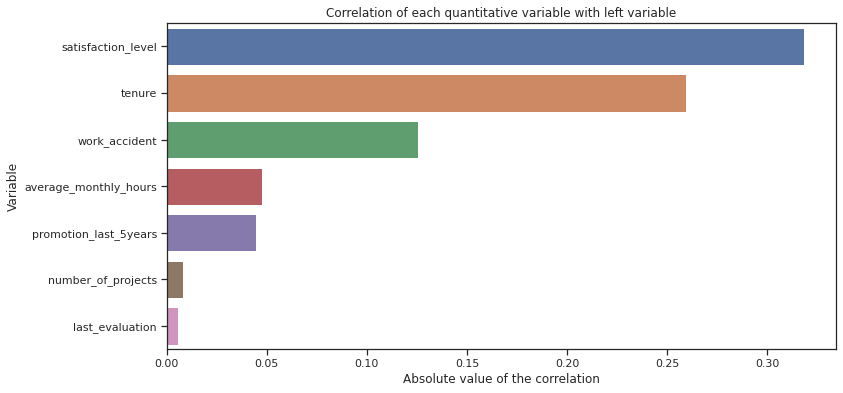

In [35]:
# Looking for features correlated with 'left' (spearman correlation)

correlations = abs(df.corr(method = 'spearman')['left']).sort_values(ascending=False)
correlations = correlations.drop('left', axis = 0)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel('Absolute value of the correlation')
plt.ylabel('Variable')
plt.title('Correlation of each quantitative variable with left variable')
plt.show()

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the types of models most appropriate for this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [43]:
### YOUR CODE HERE ###

# Prepare the data for logistic regression

# 2 variables are categorical -> we not to encode them

df_encoded = df.copy()
df_encoded['salary'] = df['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

df_encoded = pd.get_dummies(df_encoded, drop_first=False)
df_encoded

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


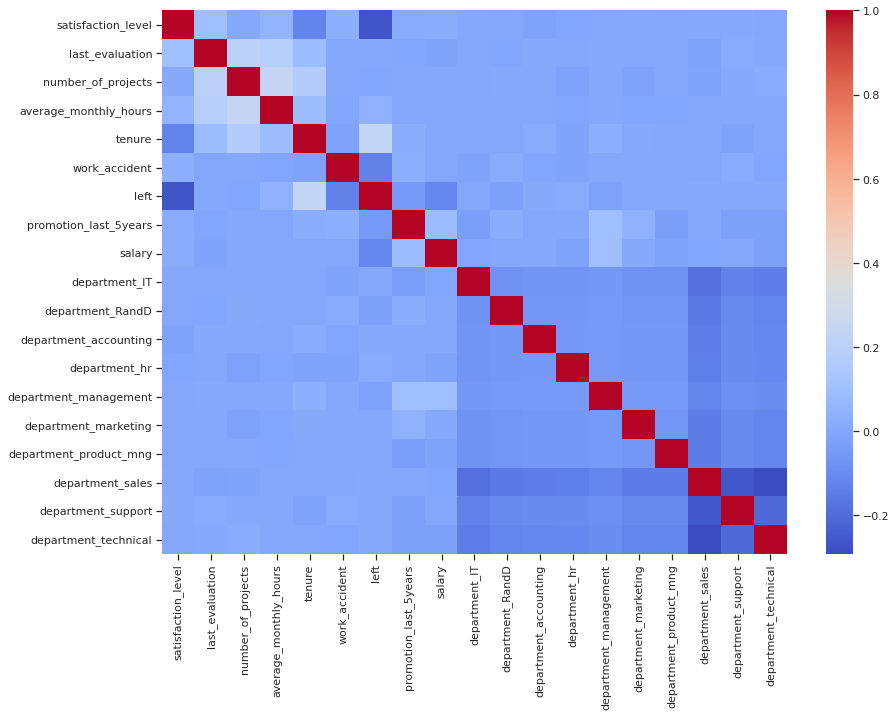

In [46]:
# Correlation heatmap 

corr_matrix = df_encoded.corr(method='kendall')
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm")

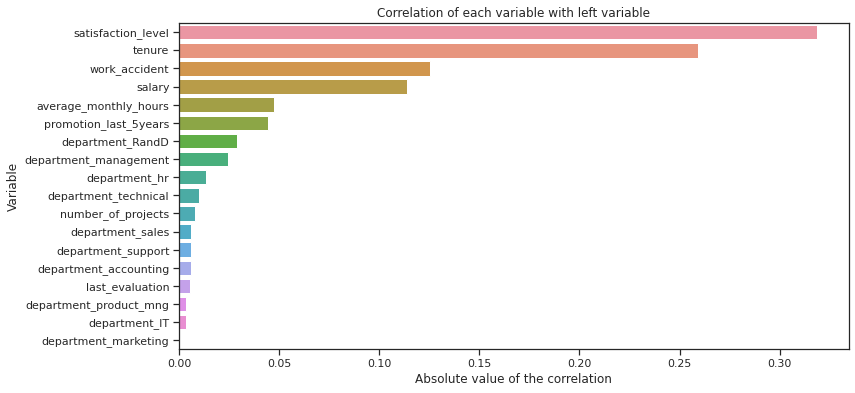

In [48]:
# Checking for features correlated with 'left' (spearman correlation)

correlations = abs(df_encoded.corr(method = 'spearman')['left']).sort_values(ascending=False)
correlations = correlations.drop('left', axis = 0)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel('Absolute value of the correlation')
plt.ylabel('Variable')
plt.title('Correlation of each variable with left variable')
plt.show()

In [52]:
# Drop the outliers in tenure 

df_encoded = df_encoded.drop(outliers1.index, axis=0)
df_encoded.shape

(11167, 19)

In [53]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
# Preparing the data

y = df_encoded['left']
X = df_encoded.drop('left', axis = 1)

# Split the data in training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [61]:
# Test 1 of regression logistic

logit_model = sm.Logit(y_train, X_train)

In [62]:
result = logit_model.fit(random_state=42, max_iter=500)

Optimization terminated successfully.
         Current function value: 0.317011
         Iterations 8


In [63]:
# Printing summary 

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 8375
Model:                          Logit   Df Residuals:                     8357
Method:                           MLE   Df Model:                           17
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                  0.3009
Time:                        08:24:30   Log-Likelihood:                -2655.0
converged:                       True   LL-Null:                       -3797.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
satisfaction_level        -4.4593      0.158    -28.249      0.000      -4.769      -4.150
last_evaluation           -0.0467      0.236     -0.198      0.843      -0.508       0.415
numb

In [108]:
# Get the predictions

y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
y_pred = np.where(y_test_pred > 0.5, 1, 0)

In [109]:
# Metrics
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.45      0.28      0.34       471

    accuracy                           0.82      2792
   macro avg       0.66      0.60      0.62      2792
weighted avg       0.79      0.82      0.80      2792



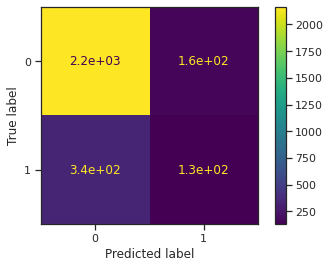

In [118]:
# Confusion matrix 

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1])
disp.plot()
plt.show()

In [122]:
# Test 2 of regression logistic

log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [123]:
# Get the predictions

y_pred = log_clf.predict(X_test)

In [124]:
# Metrics
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



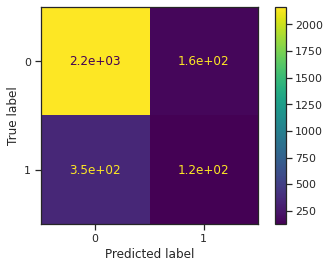

In [125]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = log_clf.classes_)
disp.plot()
plt.show()

In the two models, there's a lot of false negative, wich means that ours models doesn't predict 342/352 employees who were going to left. Let's try another approach.

In [126]:
# Test 3 : Tree based model

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [127]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.64 s, sys: 21 µs, total: 2.64 s
Wall time: 2.64 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [128]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [129]:
tree1.best_score_

0.9738070859906354

This seems to be a better approach with a best score

In [131]:
# Import the function to import the best parameters

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [132]:
# Show all scores

tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.959115,0.912839,0.935275,0.978747,0.973807


In [133]:
# Test 4 : Random forest

rf = RandomForestClassifier(random_state=0)

# Looking for the best parameters

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [134]:
#%%time
#rf1.fit(X_train, y_train)

CPU times: user 8min 33s, sys: 1.11 s, total: 8min 35s
Wall time: 8min 35s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [135]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [140]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [141]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [142]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [143]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [144]:
# Check best AUC score on CV
rf1.best_score_

0.9801962654493814

In [145]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [148]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.959115,0.912839,0.935275,0.978747,0.973807


In [149]:
rf1_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.968225,0.908588,0.937377,0.979583,0.980196


Random forest is the best choice because it has the best scores.

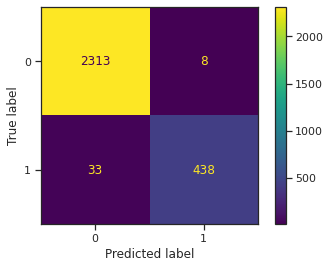

In [153]:
# Confusion matrix

preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='')

Only 33 false negatives, which means that the model didn't predict the departure of 33 employees on the 471 who left. This model performs much better.

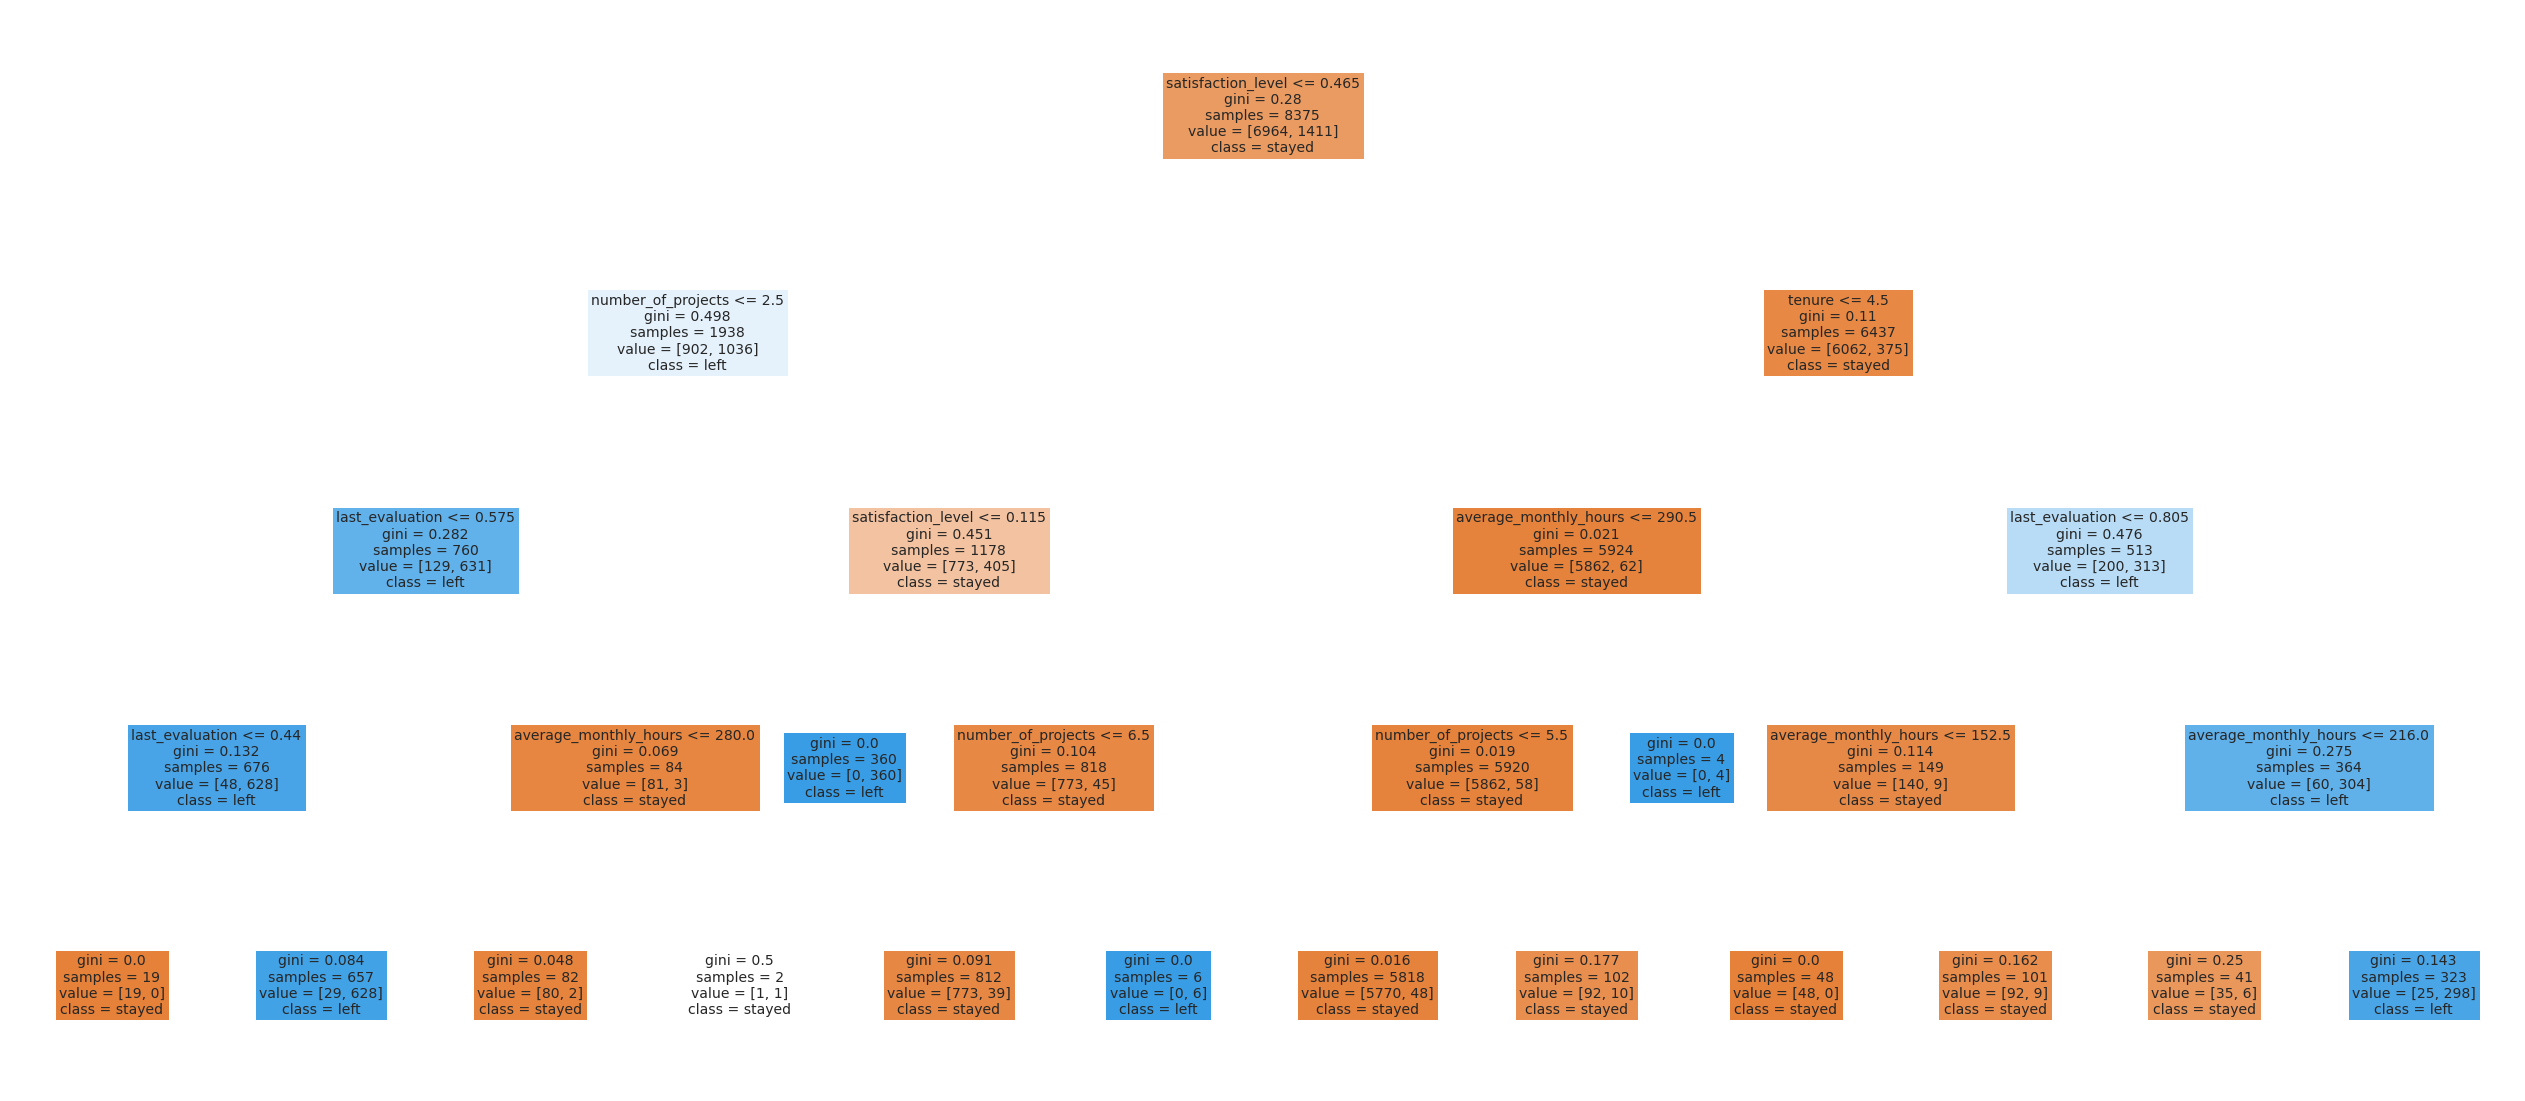

In [158]:
# Plot the tree
plt.figure(figsize=(45,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [159]:
# See the decision tree feature importance
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.553990
tenure,0.167601
last_evaluation,0.138160
number_of_projects,0.114046
average_monthly_hours,0.026202


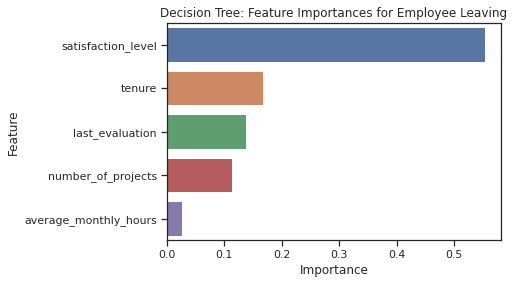

In [160]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

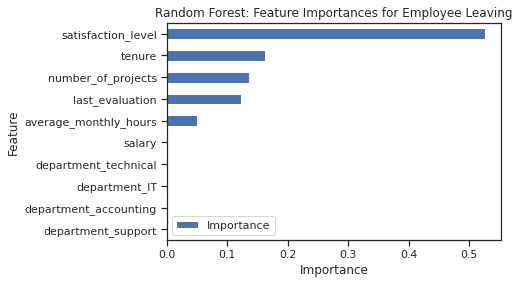

In [161]:
# Random forest feature importance

# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### Conclusion, Recommendations, Next Steps

It'll be insteresting to try without the satisfaction variable, as we won't have this information for all the employees 